In [1]:
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import Dataset, transformations, FeedforwardNeuralNetModel, train_nn
from ipynb.fs.defs.Model_Validation_Module import validation_plots, metrics, eucleidian
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2023.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
data = feature_expansion(data, env=only_env)

In [5]:
data = initializer(data, model_type, dropna=True)

In [6]:
#Operational Split
test = data[(data['dt_placement']>pd.to_datetime('2021-01-01', format="%Y-%m-%d")) & (data['dt_placement']<pd.to_datetime('2022-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
train = data[(data['dt_placement']<pd.to_datetime('2021-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
data

,x,y,dt_placement,ndvi,ndwi,ndmi,ndbi,ndvi_mean,ndvi_std,ndwi_mean,...,landcover,null_island_distance,vert_distance,days_distance,mo_sin,mo_cos,year,lst,summer_days_month,mosq_now
0,10.643895,45.455490,2010-05-10,0.333217,-0.037408,0.190331,-0.190331,0.217599,0.174718,0.184563,...,9,5161.429809,5054.419876,130,5.000000e-01,-8.660254e-01,2010,15.96,0,1.0
1,10.643895,45.455490,2010-06-21,0.237465,0.018893,0.217427,-0.217427,0.236604,0.252246,0.024957,...,9,5161.429809,5054.419876,172,1.224647e-16,-1.000000e+00,2010,18.97,0,2.0
2,10.666028,45.429941,2011-05-03,0.165839,-0.144251,0.035933,-0.035933,0.292501,0.115789,-0.129666,...,9,5159.123837,5051.578957,123,5.000000e-01,-8.660254e-01,2011,18.90,0,19.0
3,10.666028,45.429941,2011-05-17,0.165839,-0.144251,0.035933,-0.035933,0.292501,0.115789,-0.129666,...,9,5159.123837,5051.578957,137,5.000000e-01,-8.660254e-01,2011,18.85,0,34.0
4,10.666028,45.429941,2011-06-02,0.349474,-0.206151,0.115504,-0.115504,0.352167,0.079044,-0.209082,...,9,5159.123837,5051.578957,153,1.224647e-16,-1.000000e+00,2011,23.44,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,13.522398,45.941135,2023-07-18,0.457327,-0.426320,0.033302,-0.033302,0.542193,0.104122,-0.473566,...,22,5277.182405,5108.421136,199,-5.000000e-01,-8.660254e-01,2023,30.00,1,19.0
7113,13.522398,45.941135,2023-08-01,0.457327,-0.426320,0.033302,-0.033302,0.412796,0.015961,-0.341177,...,22,5277.182405,5108.421136,213,-8.660254e-01,-5.000000e-01,2023,18.43,1,32.0
7114,13.522398,45.941135,2023-08-15,0.542664,-0.463383,0.208702,-0.208702,0.448055,0.017189,-0.394370,...,22,5277.182405,5108.421136,227,-8.660254e-01,-5.000000e-01,2023,26.77,1,35.0
7115,13.522398,45.941135,2023-08-29,0.561294,-0.475090,0.135851,-0.135851,0.541352,0.095623,-0.464199,...,22,5277.182405,5108.421136,241,-8.660254e-01,-5.000000e-01,2023,27.73,0,9.0


In [7]:
#define a nn 
model = FeedforwardNeuralNetModel(num_features=len(train.iloc[0,:])-2, num_class=1, encode_layers = [512,360,256,128,64],
                                  decode_layers = [64,128,256,360,512], latent_dim=10, dropout=[0.3,0.3,0.1,0.1,0.0],
                                  model_type=model_type, learning_rate = 0.001, epochs = 50, batch_size = 128,
                                  transformation_list = transformation_list, early_stop = None)
#define a nn 
# model = FeedforwardNeuralNetModel(num_features=len(train.iloc[0,:])-2, num_class=1, encode_layers = [512,360,256,128],
#                                   latent_dim=5, dropout=[0.3,0.3,0,0],
#                                   model_type=model_type, learning_rate = 0.001, epochs = 100, batch_size = 128,
#                                   transformation_list = transformation_list, early_stop = None)

In [8]:
#preprocess nn input
del train[date_col]
date = test[date_col]
del test[date_col]

train_X, train_y, test_X, test_y = transformations(train, test = test, model_type = model.model_type, 
                                                   embedding_data = model.embedding_data,
                                                   transformation_list = model.transformation_list)

training_set = Dataset(train_X, train_y)

testing_set = Dataset(test_X, test_y)

Epoch 001: | Train Loss: 93085.73592 | Val Loss: 51078.10254 | Train Acc: 174.286| Val Acc: 112.278
Epoch 002: | Train Loss: 91938.37829 | Val Loss: 51051.59212 | Train Acc: 173.199| Val Acc: 112.527
Epoch 003: | Train Loss: 90955.04574 | Val Loss: 50230.67090 | Train Acc: 172.274| Val Acc: 111.254
Epoch 004: | Train Loss: 90030.84519 | Val Loss: 49904.60189 | Train Acc: 171.310| Val Acc: 110.677
Epoch 005: | Train Loss: 88986.80541 | Val Loss: 48861.99186 | Train Acc: 170.228| Val Acc: 108.720
Epoch 006: | Train Loss: 87818.74250 | Val Loss: 48652.80371 | Train Acc: 169.234| Val Acc: 108.828
Epoch 007: | Train Loss: 86724.05787 | Val Loss: 47987.89404 | Train Acc: 167.949| Val Acc: 107.731
Epoch 008: | Train Loss: 85348.59385 | Val Loss: 47107.93620 | Train Acc: 166.465| Val Acc: 106.489
Epoch 009: | Train Loss: 83933.53485 | Val Loss: 47323.67692 | Train Acc: 165.122| Val Acc: 107.023
Epoch 010: | Train Loss: 82555.72471 | Val Loss: 47775.25277 | Train Acc: 163.661| Val Acc: 108.130


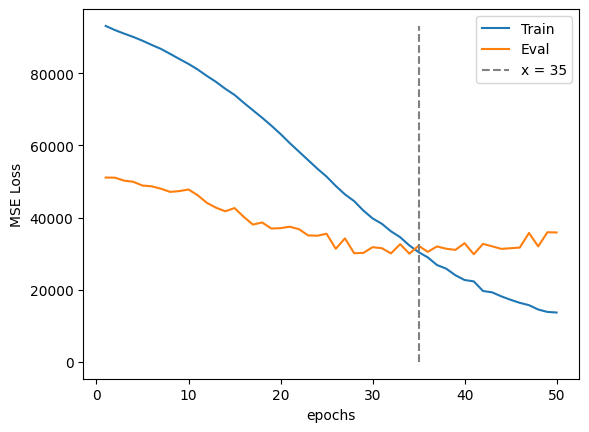

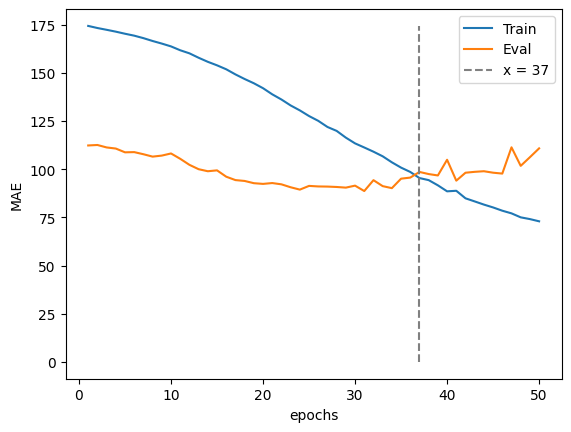

In [9]:
#train_nn
results_train, results_test, latent_train, latent_test, _ = train_nn(model = model, train_set = training_set,
                                                                     test_set = testing_set, features=None, max_val = train_y.max())

MAE on train set:  58.21087314662274
min prediction: 1
max prediction: 897

MAE on test set:  110.45131578947368
Error <= 30: 37.63 %
min prediction: 1
max prediction: 806


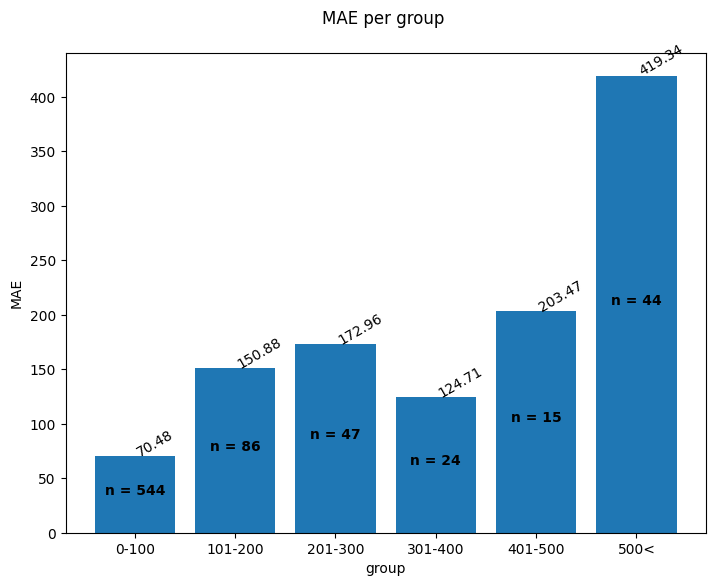

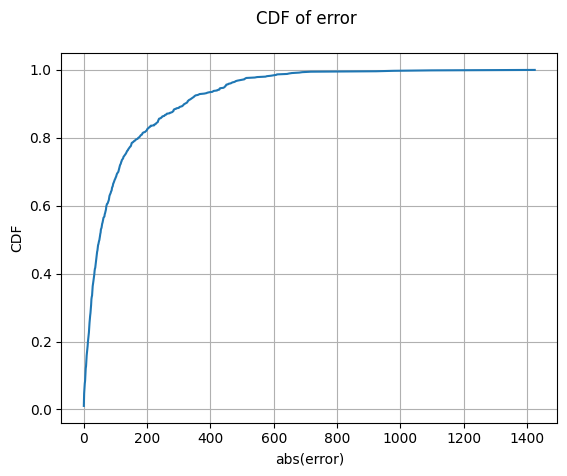

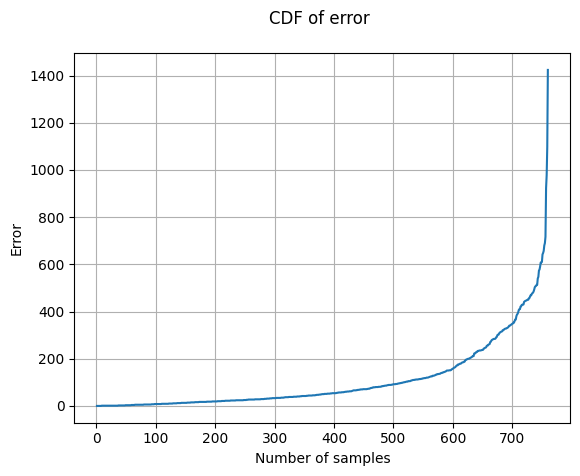

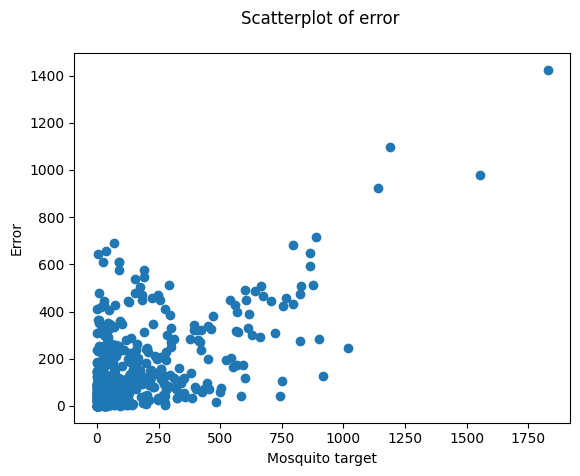

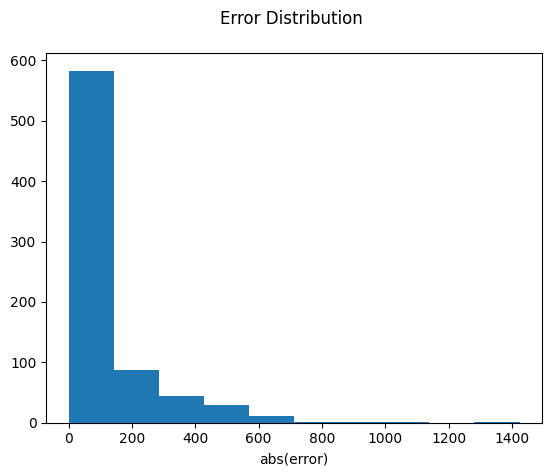

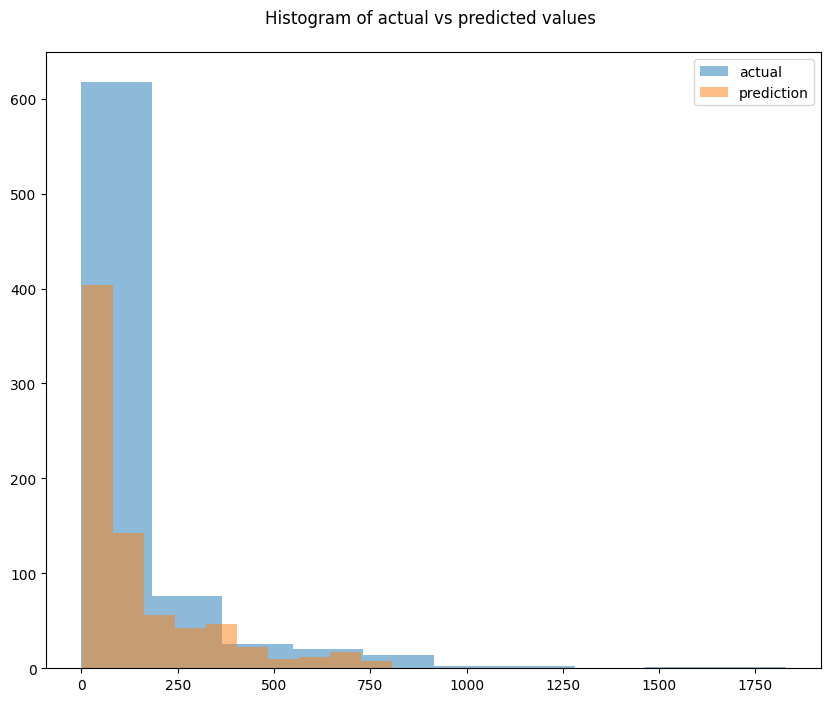

In [10]:
results_test[date_col] = date
results_test['dt_prediction'] = results_test[date_col] + datetime.timedelta(days=15)
results_test['error'] = results_test['actual'] - results_test['prediction']
results_test['abs(error)'] = np.abs(results_test['actual'] - results_test['prediction'])

if model_type == 'mosquito_regression':
    metrics(results_train, results_test, threshold=30)
else:
    metrics(results_train, results_test)
validation_plots(results_test,model_type)

In [11]:
results_train['error'] = results_train['actual'] - results_train['prediction']
results_train['abs(error)'] = np.abs(results_train['actual'] - results_train['prediction'])
results_train = pd.concat([results_train, pd.DataFrame(latent_train)],axis=1)
results_train

,actual,prediction,error,abs(error),0,1,2,3,4,5,6,7,8,9
0,101.0,144,-43.0,43.0,-0.686061,-0.983875,2.354389,-1.154101,-0.930402,0.635022,-0.913322,-0.812291,-0.986515,2.971519
1,58.0,114,-56.0,56.0,0.113298,0.162077,1.070057,-1.312363,-0.990392,0.657326,0.215468,-1.084920,-0.559844,2.774426
2,3.0,34,-31.0,31.0,-0.034592,2.400752,-0.321141,-0.193938,-0.614154,-0.107696,0.973299,0.349227,1.904809,-0.120866
3,141.0,167,-26.0,26.0,-1.117088,-0.431734,0.079205,-1.041029,-0.377462,0.794393,-1.531786,1.151595,-0.633731,4.579102
4,2.0,1,1.0,1.0,-2.045819,5.817244,-4.156053,-1.165423,-1.152816,-1.765532,10.120471,-2.137780,7.609047,-3.033935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,83.0,35,48.0,48.0,0.041429,2.221410,-0.287284,-0.508517,-0.523193,-0.865975,0.877254,-0.714468,1.501673,-0.186167
4852,538.0,471,67.0,67.0,-2.481962,-1.546552,3.178271,-1.348014,-1.214241,2.037759,-2.140182,-0.019731,-1.228306,8.240879
4853,65.0,57,8.0,8.0,-0.163055,1.435705,0.216238,-1.202952,-0.775452,-0.075096,-0.050211,-0.776806,0.491032,1.681605
4854,881.0,708,173.0,173.0,-0.775352,-2.211889,9.203670,-1.289533,-1.624636,1.741847,-1.196055,0.028600,-1.786091,4.622212


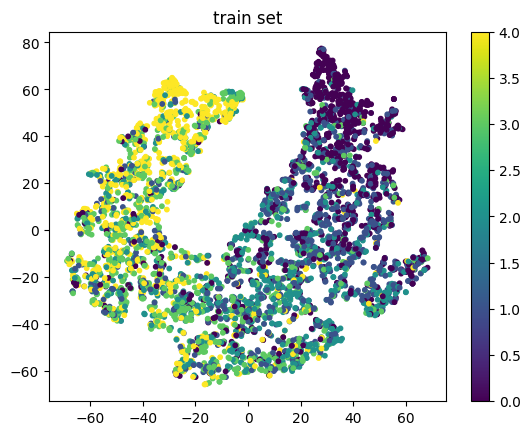

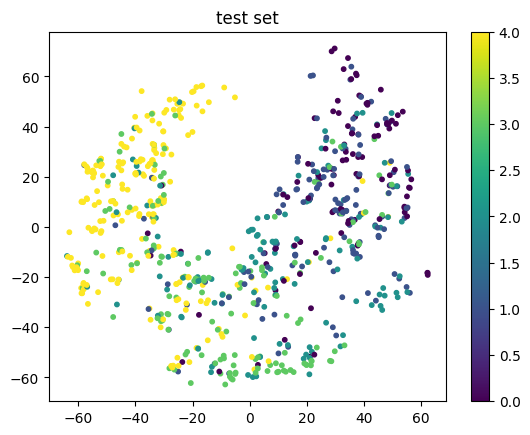

In [12]:
q=5
bins, bounds = pd.qcut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), retbins=True, q=q, duplicates='drop')

# q=[-1, 5, 10, 20, 50, 100, 200, 300, 400, 500, 600]
# bins, bounds = pd.cut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), bins=q, retbins=True, labels=classes)

bins = bins.cat.codes
latent = np.concatenate((latent_train, latent_test))
colour_dots = pd.concat([results_train['abs(error)'], results_test['abs(error)']])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(latent)
X1_tsne = X_tsne[:latent_train.shape[0],:]
X2_tsne = X_tsne[latent_train.shape[0]:,:]

# Visualize the t-SNE result
plt.scatter(X1_tsne[:, 0], X1_tsne[:, 1], c=bins[:latent_train.shape[0]], s=10)
plt.colorbar()
plt.title('train set')
plt.show()

plt.scatter(X2_tsne[:, 0], X2_tsne[:, 1], c=bins[latent_train.shape[0]:], s=10)
plt.colorbar()
plt.title('test set')
plt.show()

In [13]:
#keep only train observations with error less than MAE
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean(), 0:].reset_index(drop=True)
results_good

,0,1,2,3,4,5,6,7,8,9
0,-0.686061,-0.983875,2.354389,-1.154101,-0.930402,0.635022,-0.913322,-0.812291,-0.986515,2.971519
1,0.113298,0.162077,1.070057,-1.312363,-0.990392,0.657326,0.215468,-1.084920,-0.559844,2.774426
2,-0.034592,2.400752,-0.321141,-0.193938,-0.614154,-0.107696,0.973299,0.349227,1.904809,-0.120866
3,-1.117088,-0.431734,0.079205,-1.041029,-0.377462,0.794393,-1.531786,1.151595,-0.633731,4.579102
4,-2.045819,5.817244,-4.156053,-1.165423,-1.152816,-1.765532,10.120471,-2.137780,7.609047,-3.033935
...,...,...,...,...,...,...,...,...,...,...
3218,0.356251,-1.288619,7.527686,-1.629560,-1.171769,1.394731,-1.295636,0.978665,-1.486782,4.160476
3219,-1.083919,4.513448,-2.742332,-0.761756,-1.073258,-1.378926,7.351748,-1.421369,5.684941,-2.243726
3220,0.041429,2.221410,-0.287284,-0.508517,-0.523193,-0.865975,0.877254,-0.714468,1.501673,-0.186167
3221,-0.163055,1.435705,0.216238,-1.202952,-0.775452,-0.075096,-0.050211,-0.776806,0.491032,1.681605


In [14]:
percentage =0.2

In [15]:
euc_M_dist = eucleidian(np.array(results_good), latent_test, 3)
results_test['dist'] = euc_M_dist
results_test_latent = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_latent.corr().loc['abs(error)','dist'])
print("good:", results_test_latent.iloc[:round(len(results_test_latent)*percentage)]['abs(error)'].mean())
print("bad:", results_test_latent.iloc[-round(len(results_test_latent)*percentage):]['abs(error)'].mean())

correlation: 0.365277542692743
good: 42.598684210526315
bad: 204.69736842105263


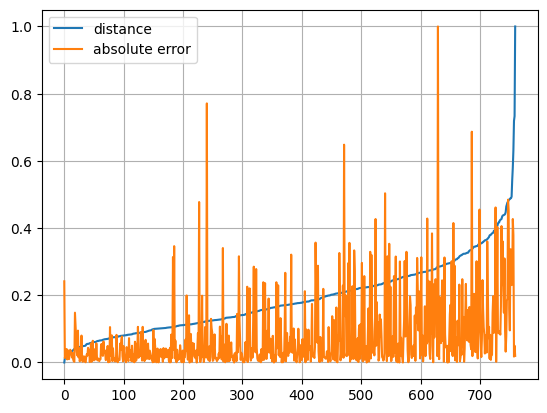

In [16]:
distance = (results_test_latent['dist'] - results_test_latent['dist'].min())/(results_test_latent['dist'].max()-results_test_latent['dist'].min())
error=(results_test_latent['abs(error)']-results_test_latent['abs(error)'].min())/(results_test_latent['abs(error)'].max()-results_test_latent['abs(error)'].min())
plt.plot(distance, label='distance')
plt.plot(error, label='absolute error')
plt.legend()
plt.grid()
plt.show()

In [17]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train_X[0][results_good,:]

euc_M_dist = eucleidian(results_good, test_X[0], 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_fs = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_fs.corr().loc['abs(error)','dist'])
print("good:", results_test_fs.iloc[:round(len(results_test_fs)*percentage)][ 'abs(error)'].mean())
print("bad:", results_test_fs.iloc[-round(len(results_test_fs)*percentage):]['abs(error)'].mean())

correlation: 0.010537263609637746
good: 96.63157894736842
bad: 104.8092105263158


In [18]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train.loc[results_good,['x','y']]

euc_M_dist = eucleidian(np.array(results_good.drop_duplicates().reset_index(drop=True)), np.array(test[['x','y']]), 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_coord = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_coord.corr().loc['abs(error)','dist'])
print("good:", results_test_coord.iloc[:round(len(results_test_coord)*percentage)]['abs(error)'].mean())
print("bad:", results_test_coord.iloc[-round(len(results_test_coord)*percentage):]['abs(error)'].mean())

correlation: 0.0040748922697775025
good: 109.4407894736842
bad: 100.90131578947368
